In [2]:
import torch
import numpy as np
from objective_function import obj_fun
from MRFO import OriginalMRFO, IMRFO
from load_save import save, load
from plot_res import plot_res
from classifier import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the training and testing data
X_train = load('X_train')
X_test = load('X_test')
y_train = load('y_train')
y_test = load('y_test')

In [3]:
# Iterate over the outermost arrays
for outer_array in X_train:

    # Iterate over the arrays within each outermost array
    for inner_array in outer_array:

        # Print the elements of the inner array
        print(len(inner_array))

4826
5630
6435
84918
99071
113224


In [4]:
for outer_array in X_train:

    for inner_array in outer_array:

        X_train = np.array(inner_array)

        X_train = np.array([inner_array])

In [5]:
for outer_array in y_train:

    for inner_array in outer_array:

        y_train = np.array(inner_array)

        y_train = np.array([inner_array])

In [6]:
X_train = torch.as_tensor(X_train)
y_train = torch.as_tensor(y_train)

In [7]:
X_train = X_train.to(device)
y_train = y_train.to(device)

In [ ]:
def train_model(X_train, y_train, epoch, pop_size):

    # Optimization parameters
    lb = (np.zeros([1, X_train.shape[1]]).astype('int16')).tolist()[0]
    ub = (np.ones([1, X_train.shape[1]]).astype('int16')).tolist()[0]
    problem_dict1 = {"fit_func": obj_fun,
                     "lb": lb,
                     "ub": ub,
                     "minmax": "min"}

    # Create IMRFO model
    model = IMRFO(epoch, pop_size)

    # Move the model to the specified device
    model = model.to(device)

    # Train the model
    best_accuracy = 0
    for i in range(epoch):
        best_position, best_fitness = model.solve(problem_dict1)

        # Make predictions on the training data
        predictions = model.predict(X_train)

        # Evaluate the model's accuracy
        accuracy = (predictions == y_train).mean()

        # Save the model if it achieves a new best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            model.save("models/model_4.0_T2_90_10.pt")

        # Stop training if the accuracy reaches 99.6% or above
        if accuracy >= 0.996:
            print("Reached 99.6% accuracy, stopping training...")
            break

    return model

# Train the model
model = train_model(X_train, y_train, 10000, 100)

# # Make predictions on the test data
# predictions = model.predict(X_test)

# # Evaluate the model's performance
# accuracy = (predictions == y_test).mean()
# print("Accuracy:", accuracy)

# # Plot the model's performance
# plot_res(model, X_train, y_train)

TP values: [0.985729, 0.7985730265069056, 0.3900360060367694, 0.3777560929479557]
FN values: [0.015386, 0.012464728729534438, 0.006087975487057533, 0.005896301362846429]
FP values: [0.01765, 0.014298873136376108, 0.0069838013354065675, 0.0067639229854568736]
TN values: [0.982641, 0.7960713313088814, 0.38881413756516964, 0.3765726938443245]


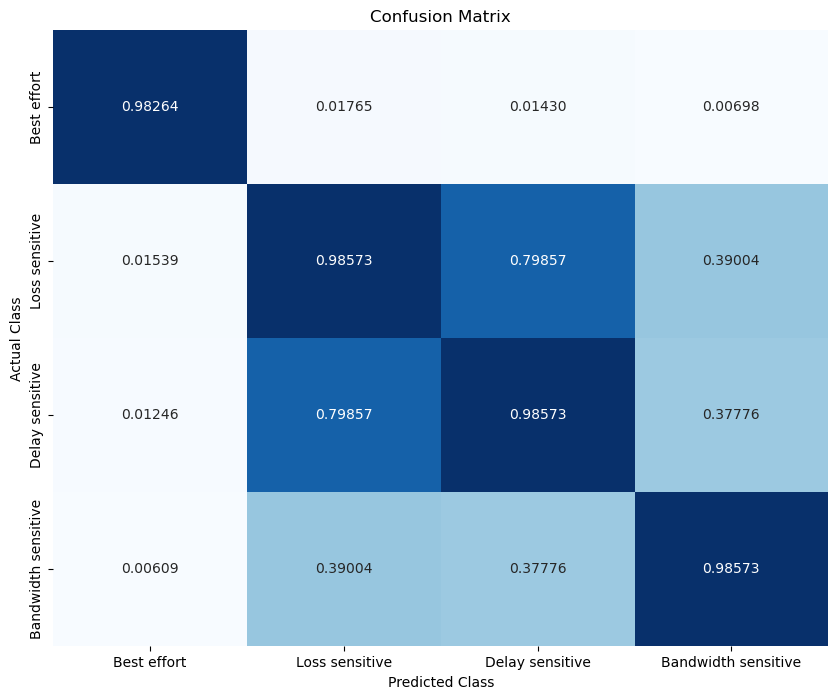

In [19]:
# DARKNET DATASET 90-10
total_population = 54665  # Total population size

# Class 1
TP_1 = 0.985729
FN_1 = 0.015386
FP_1 = 0.01765
TN_1 = 0.982641

# Class 2
TP_2 = 0.985729 * 44286 / total_population
FN_2 = 0.015386 * 44286 / total_population
FP_2 = 0.01765 * 44286 / total_population
TN_2 = 0.982641 * 44286 / total_population

# Class 3
TP_3 = 0.985729 * 21630 / total_population
FN_3 = 0.015386 * 21630 / total_population
FP_3 = 0.01765 * 21630 / total_population
TN_3 = 0.982641 * 21630 / total_population

# Class 4
TP_4 = 0.985729 * 20949 / total_population
FN_4 = 0.015386 * 20949 / total_population
FP_4 = 0.01765 * 20949 / total_population
TN_4 = 0.982641 * 20949 / total_population

# Store the calculated values into new lists
TP = [TP_1, TP_2, TP_3, TP_4]
FN = [FN_1, FN_2, FN_3, FN_4]
FP = [FP_1, FP_2, FP_3, FP_4]
TN = [TN_1, TN_2, TN_3, TN_4]

# Display the new lists
print("TP values:", TP)
print("FN values:", FN)
print("FP values:", FP)
print("TN values:", TN)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a confusion matrix as a NumPy array
conf_matrix = np.array([[TN[0], FP[0], FP[1], FP[2]],  # Best effort
                        [FN[0], TP[0], TP[1], TP[2]],  # Loss sensitive
                        [FN[1], TP[1], TP[0], TP[3]],  # Delay sensitive
                        [FN[2], TP[2], TP[3], TP[0]]   # Bandwidth sensitive
                        ])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.5f', cmap='Blues', cbar=False,
            xticklabels=['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive'],
            yticklabels=['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig(r"C:\Users\alosh\OneDrive\Desktop\VSCODE\DeepthyJ\Results\confusion_matrix_darknet.jpg")
plt.show()

TP values: [0.921468, 0.2207445096966683, 0.19909390651417205, 0.1565945743411238]
FN values: [0.0822319, 0.019699262966185974, 0.017767160890104425, 0.01397451607409249]
FP values: [0.001218, 0.00029178095474888114, 0.0002631631029338637, 0.00020698731974142214]
TN values: [0.928364, 0.2223964977623073, 0.20058386772749873, 0.15776648284435604]


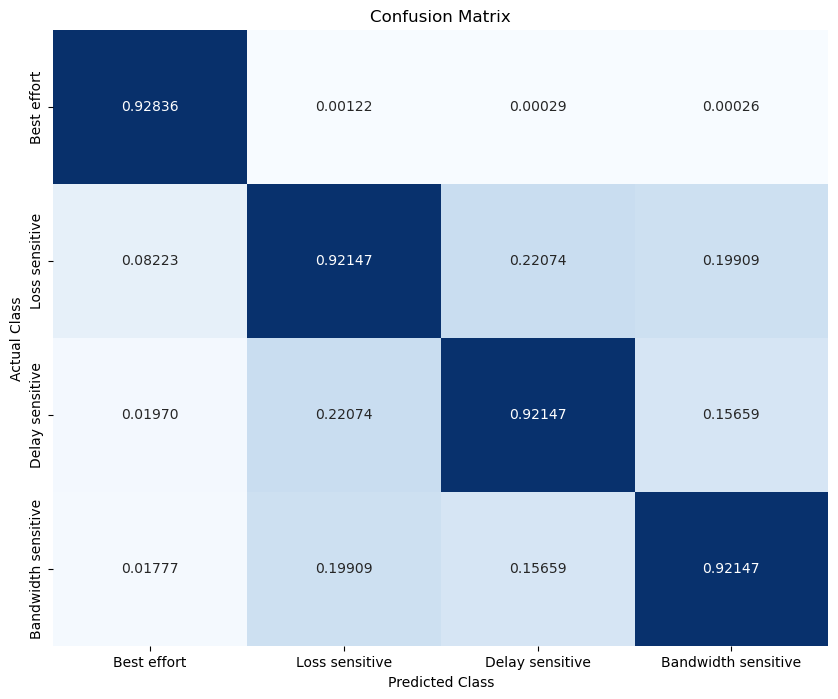

In [20]:
# TOR DATASET 90-10
total_population = 8044  # Total population size

# Class 1
TP_1 = 0.921468
FN_1 = 0.0822319
FP_1 = 0.001218
TN_1 = 0.928364

# Class 2
TP_2 = 0.921468 * 1927 / total_population
FN_2 = 0.0822319 * 1927 / total_population
FP_2 = 0.001218 * 1927 / total_population
TN_2 = 0.928364 * 1927 / total_population

# Class 3
TP_3 = 0.921468 * 1738 / total_population
FN_3 = 0.0822319 * 1738 / total_population
FP_3 = 0.001218 * 1738 / total_population
TN_3 = 0.928364 * 1738 / total_population

# Class 4
TP_4 = 0.921468 * 1367 / total_population
FN_4 = 0.0822319 * 1367 / total_population
FP_4 = 0.001218 * 1367 / total_population
TN_4 = 0.928364 * 1367 / total_population

# Store the calculated values into new lists
TP = [TP_1, TP_2, TP_3, TP_4]
FN = [FN_1, FN_2, FN_3, FN_4]
FP = [FP_1, FP_2, FP_3, FP_4]
TN = [TN_1, TN_2, TN_3, TN_4]

# Display the new lists
print("TP values:", TP)
print("FN values:", FN)
print("FP values:", FP)
print("TN values:", TN)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a confusion matrix as a NumPy array
conf_matrix = np.array([[TN[0], FP[0], FP[1], FP[2]],  # Best effort
                        [FN[0], TP[0], TP[1], TP[2]],  # Loss sensitive
                        [FN[1], TP[1], TP[0], TP[3]],  # Delay sensitive
                        [FN[2], TP[2], TP[3], TP[0]]   # Bandwidth sensitive
                        ])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.5f', cmap='Blues', cbar=False,
            xticklabels=['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive'],
            yticklabels=['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.savefig(r"C:\Users\alosh\OneDrive\Desktop\VSCODE\DeepthyJ\Results\confusion_matrix_tor.jpg")
plt.show()

In [69]:
# 80-20 DARKNET AND TOR PROPOSED VS BASIC MRFO
total_population_darknet = 54665  # Total population size
total_population_tor = 8044

# Class 1
TP_darknet_proposed_1 = 0.964354
FN_darknet_proposed_1 = 0.001563
FP_darknet_proposed_1 = 0.008587
TN_darknet_proposed_1 = 0.947628
TP_tor_proposed_1 = 0.998787
FN_tor_proposed_1 = 0.032126
FP_tor_proposed_1 = 0.001211
TN_tor_proposed_1 = 0.972804
TP_tor_basic_1 = 0.880788
FN_tor_basic_1 = 0.227294
FP_tor_basic_1 = 0.189704
TN_tor_basic_1 = 0.877947
TP_darknet_basic_1 = 0.878939
FN_darknet_basic_1 = 0.006721
FP_darknet_basic_1 = 0.025089
TN_darknet_basic_1 = 0.794046

# Class 2
TP_darknet_basic_2 = TP_darknet_basic_1 * 44286 / total_population_darknet
FN_darknet_basic_2 = FN_darknet_basic_1 * 44286 / total_population_darknet
FP_darknet_basic_2 = FP_darknet_basic_1 * 44286 / total_population_darknet
TN_darknet_basic_2 = TN_darknet_basic_1 * 44286 / total_population_darknet
TP_tor_basic_2 = TP_tor_basic_1 * 1927 / total_population_tor
FN_tor_basic_2 = FN_tor_basic_1 * 1927 / total_population_tor
FP_tor_basic_2 = FP_tor_basic_1 * 1927 / total_population_tor
TN_tor_basic_2 = TN_tor_basic_1 * 1927 / total_population_tor

# Class 3
TP_darknet_basic_3 = TP_darknet_basic_1 * 21630 / total_population_darknet
FN_darknet_basic_3 = FN_darknet_basic_1 * 21630 / total_population_darknet
FP_darknet_basic_3 = FP_darknet_basic_1 * 21630 / total_population_darknet
TN_darknet_basic_3 = TN_darknet_basic_1 * 21630 / total_population_darknet
TP_tor_basic_3 = TP_tor_basic_1 * 1738 / total_population_tor
FN_tor_basic_3 = FN_tor_basic_1 * 1738 / total_population_tor
FP_tor_basic_3 = FP_tor_basic_1 * 1738 / total_population_tor
TN_tor_basic_3 = TN_tor_basic_1 * 1738 / total_population_tor

# Class 4
TP_darknet_basic_4 = TP_darknet_basic_1 * 20949 / total_population_darknet
FN_darknet_basic_4 = FN_darknet_basic_1 * 20949 / total_population_darknet
FP_darknet_basic_4 = FP_darknet_basic_1 * 20949 / total_population_darknet
TN_darknet_basic_4 = TN_darknet_basic_1 * 20949 / total_population_darknet
TP_tor_basic_4 = TP_tor_basic_1 * 1367 / total_population_tor
FN_tor_basic_4 = FN_tor_basic_1 * 1367 / total_population_tor
FP_tor_basic_4 = FP_tor_basic_1 * 1367 / total_population_tor
TN_tor_basic_4 = TN_tor_basic_1 * 1367 / total_population_tor

# Store the calculated values into new lists for basic versions
TP_darknet_basic = [TP_darknet_basic_1, TP_darknet_basic_2, TP_darknet_basic_3, TP_darknet_basic_4]
FN_darknet_basic = [FN_darknet_basic_1, FN_darknet_basic_2, FN_darknet_basic_3, FN_darknet_basic_4]
FP_darknet_basic = [FP_darknet_basic_1, FP_darknet_basic_2, FP_darknet_basic_3, FP_darknet_basic_4]
TN_darknet_basic = [TN_darknet_basic_1, TN_darknet_basic_2, TN_darknet_basic_3, TN_darknet_basic_4]
TP_tor_basic = [TP_tor_basic_1, TP_tor_basic_2, TP_tor_basic_3, TP_tor_basic_4]
FN_tor_basic = [FN_tor_basic_1, FN_tor_basic_2, FN_tor_basic_3, FN_tor_basic_4]
FP_tor_basic = [FP_tor_basic_1, FP_tor_basic_2, FP_tor_basic_3, FP_tor_basic_4]
TN_tor_basic = [TN_tor_basic_1, TN_tor_basic_2, TN_tor_basic_3, TN_tor_basic_4]

# Class 2
TP_darknet_proposed_2 = TP_darknet_proposed_1 * 44286 / total_population_darknet
FN_darknet_proposed_2 = FN_darknet_proposed_1 * 44286 / total_population_darknet
FP_darknet_proposed_2 = FP_darknet_proposed_1 * 44286 / total_population_darknet
TN_darknet_proposed_2 = TN_darknet_proposed_1 * 44286 / total_population_darknet
TP_tor_proposed_2 = TP_tor_proposed_1 * 1927 / total_population_tor
FN_tor_proposed_2 = FN_tor_proposed_1 * 1927 / total_population_tor
FP_tor_proposed_2 = FP_tor_proposed_1 * 1927 / total_population_tor
TN_tor_proposed_2 = TN_tor_proposed_1 * 1927 / total_population_tor

# Class 3
TP_darknet_proposed_3 = TP_darknet_proposed_1 * 21630 / total_population_darknet
FN_darknet_proposed_3 = FN_darknet_proposed_1 * 21630 / total_population_darknet
FP_darknet_proposed_3 = FP_darknet_proposed_1 * 21630 / total_population_darknet
TN_darknet_proposed_3 = TN_darknet_proposed_1 * 21630 / total_population_darknet
TP_tor_proposed_3 = TP_tor_proposed_1 * 1738 / total_population_tor
FN_tor_proposed_3 = FN_tor_proposed_1 * 1738 / total_population_tor
FP_tor_proposed_3 = FP_tor_proposed_1 * 1738 / total_population_tor
TN_tor_proposed_3 = TN_tor_proposed_1 * 1738 / total_population_tor

# Class 4
TP_darknet_proposed_4 = TP_darknet_proposed_1 * 20949 / total_population_darknet
FN_darknet_proposed_4 = FN_darknet_proposed_1 * 20949 / total_population_darknet
FP_darknet_proposed_4 = FP_darknet_proposed_1 * 20949 / total_population_darknet
TN_darknet_proposed_4 = TN_darknet_proposed_1 * 20949 / total_population_darknet
TP_tor_proposed_4 = TP_tor_proposed_1 * 1367 / total_population_tor
FN_tor_proposed_4 = FN_tor_proposed_1 * 1367 / total_population_tor
FP_tor_proposed_4 = FP_tor_proposed_1 * 1367 / total_population_tor
TN_tor_proposed_4 = TN_tor_proposed_1 * 1367 / total_population_tor

# Store the calculated values into new lists for proposed versions
TP_darknet_proposed = [TP_darknet_proposed_1, TP_darknet_proposed_2, TP_darknet_proposed_3, TP_darknet_proposed_4]
FN_darknet_proposed = [FN_darknet_proposed_1, FN_darknet_proposed_2, FN_darknet_proposed_3, FN_darknet_proposed_4]
FP_darknet_proposed = [FP_darknet_proposed_1, FP_darknet_proposed_2, FP_darknet_proposed_3, FP_darknet_proposed_4]
TN_darknet_proposed = [TN_darknet_proposed_1, TN_darknet_proposed_2, TN_darknet_proposed_3, TN_darknet_proposed_4]
TP_tor_proposed = [TP_tor_proposed_1, TP_tor_proposed_2, TP_tor_proposed_3, TP_tor_proposed_4]
FN_tor_proposed = [FN_tor_proposed_1, FN_tor_proposed_2, FN_tor_proposed_3, FN_tor_proposed_4]
FP_tor_proposed = [FP_tor_proposed_1, FP_tor_proposed_2, FP_tor_proposed_3, FP_tor_proposed_4]
TN_tor_proposed = [TN_tor_proposed_1, TN_tor_proposed_2, TN_tor_proposed_3, TN_tor_proposed_4]

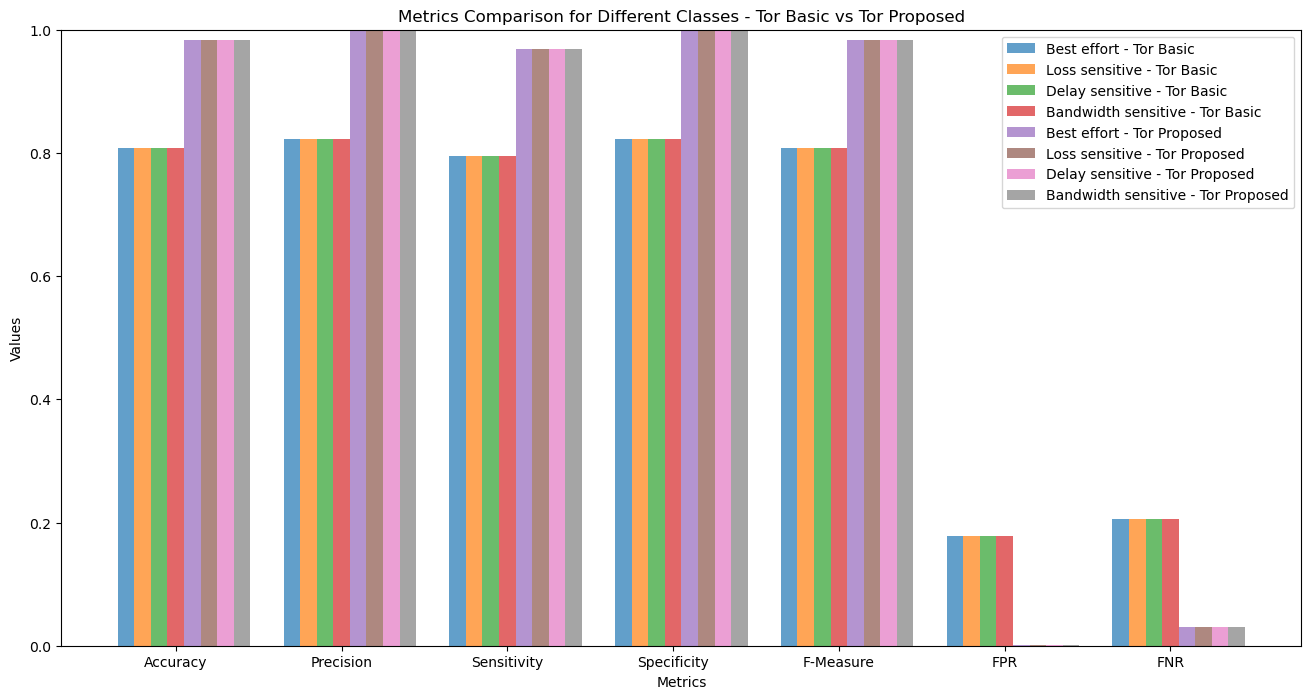

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Calculate metrics for tor_basic
accuracy_basic = [(TP_tor_basic[i] + TN_tor_basic[i]) / (TP_tor_basic[i] + TN_tor_basic[i] + FP_tor_basic[i] + FN_tor_basic[i]) for i in range(4)]
precision_basic = [TP_tor_basic[i] / (TP_tor_basic[i] + FP_tor_basic[i]) for i in range(4)]
sensitivity_basic = [TP_tor_basic[i] / (TP_tor_basic[i] + FN_tor_basic[i]) for i in range(4)]
specificity_basic = [TN_tor_basic[i] / (TN_tor_basic[i] + FP_tor_basic[i]) for i in range(4)]
f_measure_basic = [2 * (precision_basic[i] * sensitivity_basic[i]) / (precision_basic[i] + sensitivity_basic[i]) for i in range(4)]
fpr_basic = [FP_tor_basic[i] / (FP_tor_basic[i] + TN_tor_basic[i]) for i in range(4)]
fnr_basic = [FN_tor_basic[i] / (FN_tor_basic[i] + TP_tor_basic[i]) for i in range(4)]

# Calculate metrics for tor_proposed
accuracy_proposed = [(TP_tor_proposed[i] + TN_tor_proposed[i]) / (TP_tor_proposed[i] + TN_tor_proposed[i] + FP_tor_proposed[i] + FN_tor_proposed[i]) for i in range(4)]
precision_proposed = [TP_tor_proposed[i] / (TP_tor_proposed[i] + FP_tor_proposed[i]) for i in range(4)]
sensitivity_proposed = [TP_tor_proposed[i] / (TP_tor_proposed[i] + FN_tor_proposed[i]) for i in range(4)]
specificity_proposed = [TN_tor_proposed[i] / (TN_tor_proposed[i] + FP_tor_proposed[i]) for i in range(4)]
f_measure_proposed = [2 * (precision_proposed[i] * sensitivity_proposed[i]) / (precision_proposed[i] + sensitivity_proposed[i]) for i in range(4)]
fpr_proposed = [FP_tor_proposed[i] / (FP_tor_proposed[i] + TN_tor_proposed[i]) for i in range(4)]
fnr_proposed = [FN_tor_proposed[i] / (FN_tor_proposed[i] + TP_tor_proposed[i]) for i in range(4)]

# Create a side-by-side bar graph
metrics_names = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR']
classes = ['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive']

plt.figure(figsize=(16, 8))

# Set the width of the bars
bar_width = 0.1
index = np.arange(len(metrics_names))

# Plot bars for tor_basic
for i in range(4):
    plt.bar(index + i * bar_width, [accuracy_basic[i], precision_basic[i], sensitivity_basic[i], specificity_basic[i], f_measure_basic[i], fpr_basic[i], fnr_basic[i]],
            width=bar_width, label=f'{classes[i]} - Tor Basic', alpha=0.7)

# Plot bars for tor_proposed
for i in range(4):
    plt.bar(index + (i * bar_width) + 4 * bar_width, [accuracy_proposed[i], precision_proposed[i], sensitivity_proposed[i], specificity_proposed[i], f_measure_proposed[i], fpr_proposed[i], fnr_proposed[i]],
            width=bar_width, label=f'{classes[i]} - Tor Proposed', alpha=0.7)

# Configure the plot
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics Comparison for Different Classes - Tor Basic vs Tor Proposed')
plt.xticks(index + 3 * bar_width, metrics_names)
plt.legend()
plt.ylim(0, 1)  # Setting y-axis limit to 1 for better visualization

plt.show()

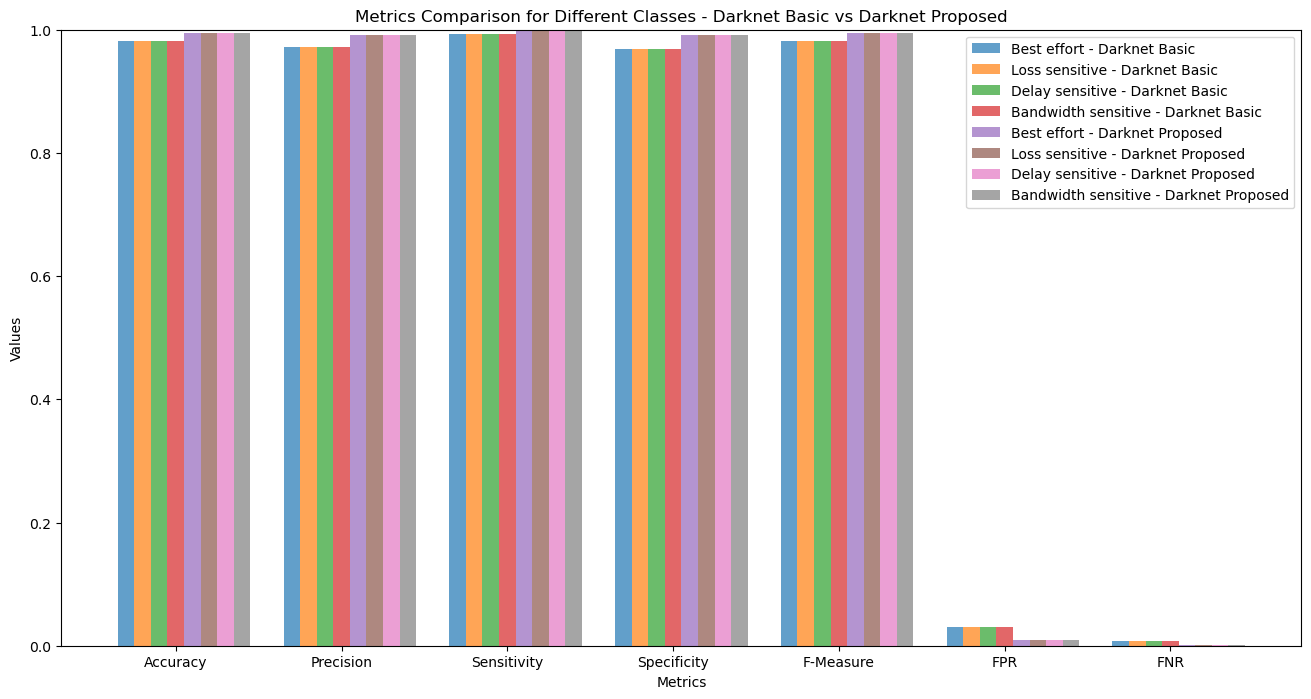

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Calculate metrics for darknet_basic
accuracy_basic = [(TP_darknet_basic[i] + TN_darknet_basic[i]) / (TP_darknet_basic[i] + TN_darknet_basic[i] + FP_darknet_basic[i] + FN_darknet_basic[i]) for i in range(4)]
precision_basic = [TP_darknet_basic[i] / (TP_darknet_basic[i] + FP_darknet_basic[i]) for i in range(4)]
sensitivity_basic = [TP_darknet_basic[i] / (TP_darknet_basic[i] + FN_darknet_basic[i]) for i in range(4)]
specificity_basic = [TN_darknet_basic[i] / (TN_darknet_basic[i] + FP_darknet_basic[i]) for i in range(4)]
f_measure_basic = [2 * (precision_basic[i] * sensitivity_basic[i]) / (precision_basic[i] + sensitivity_basic[i]) for i in range(4)]
fpr_basic = [FP_darknet_basic[i] / (FP_darknet_basic[i] + TN_darknet_basic[i]) for i in range(4)]
fnr_basic = [FN_darknet_basic[i] / (FN_darknet_basic[i] + TP_darknet_basic[i]) for i in range(4)]

# Calculate metrics for darknet_basic
accuracy_proposed = [(TP_darknet_proposed[i] + TN_darknet_proposed[i]) / (TP_darknet_proposed[i] + TN_darknet_proposed[i] + FP_darknet_proposed[i] + FN_darknet_proposed[i]) for i in range(4)]
precision_proposed = [TP_darknet_proposed[i] / (TP_darknet_proposed[i] + FP_darknet_proposed[i]) for i in range(4)]
sensitivity_proposed = [TP_darknet_proposed[i] / (TP_darknet_proposed[i] + FN_darknet_proposed[i]) for i in range(4)]
specificity_proposed = [TN_darknet_proposed[i] / (TN_darknet_proposed[i] + FP_darknet_proposed[i]) for i in range(4)]
f_measure_proposed = [2 * (precision_proposed[i] * sensitivity_proposed[i]) / (precision_proposed[i] + sensitivity_proposed[i]) for i in range(4)]
fpr_proposed = [FP_darknet_proposed[i] / (FP_darknet_proposed[i] + TN_darknet_proposed[i]) for i in range(4)]
fnr_proposed = [FN_darknet_proposed[i] / (FN_darknet_proposed[i] + TP_darknet_proposed[i]) for i in range(4)]

# Your previous calculations for Darknet_basic and Darknet_proposed

# Create a side-by-side bar graph
metrics_names = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR']
classes = ['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive']

plt.figure(figsize=(16, 8))

# Set the width of the bars
bar_width = 0.1
index = np.arange(len(metrics_names))

# Plot bars for Darknet_basic
for i in range(4):
    plt.bar(index + i * bar_width, [accuracy_basic[i], precision_basic[i], sensitivity_basic[i], specificity_basic[i], f_measure_basic[i], fpr_basic[i], fnr_basic[i]],
            width=bar_width, label=f'{classes[i]} - Darknet Basic', alpha=0.7)

# Plot bars for Darknet_proposed
for i in range(4):
    plt.bar(index + (i * bar_width) + 4 * bar_width, [accuracy_proposed[i], precision_proposed[i], sensitivity_proposed[i], specificity_proposed[i], f_measure_proposed[i], fpr_proposed[i], fnr_proposed[i]],
            width=bar_width, label=f'{classes[i]} - Darknet Proposed', alpha=0.7)

# Configure the plot
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics Comparison for Different Classes - Darknet Basic vs Darknet Proposed')
plt.xticks(index + 3 * bar_width, metrics_names)
plt.legend()
plt.ylim(0, 1)  # Setting y-axis limit to 1 for better visualization

plt.show()

['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR'] [0.9568351102857788, 0.9986799409549943, 0.9180712282625514, 0.9986897336652387, 0.9566805903220117, 0.001310266334761215, 0.08192877173744861]
['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR'] [0.956835110285779, 0.9986799409549945, 0.9180712282625515, 0.9986897336652388, 0.9566805903220119, 0.0013102663347612153, 0.08192877173744861]
['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR'] [0.9568351102857788, 0.9986799409549945, 0.9180712282625515, 0.9986897336652387, 0.9566805903220119, 0.0013102663347612153, 0.08192877173744861]
['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR'] [0.9568351102857787, 0.9986799409549945, 0.9180712282625513, 0.9986897336652388, 0.9566805903220117, 0.001310266334761215, 0.0819287717374486]


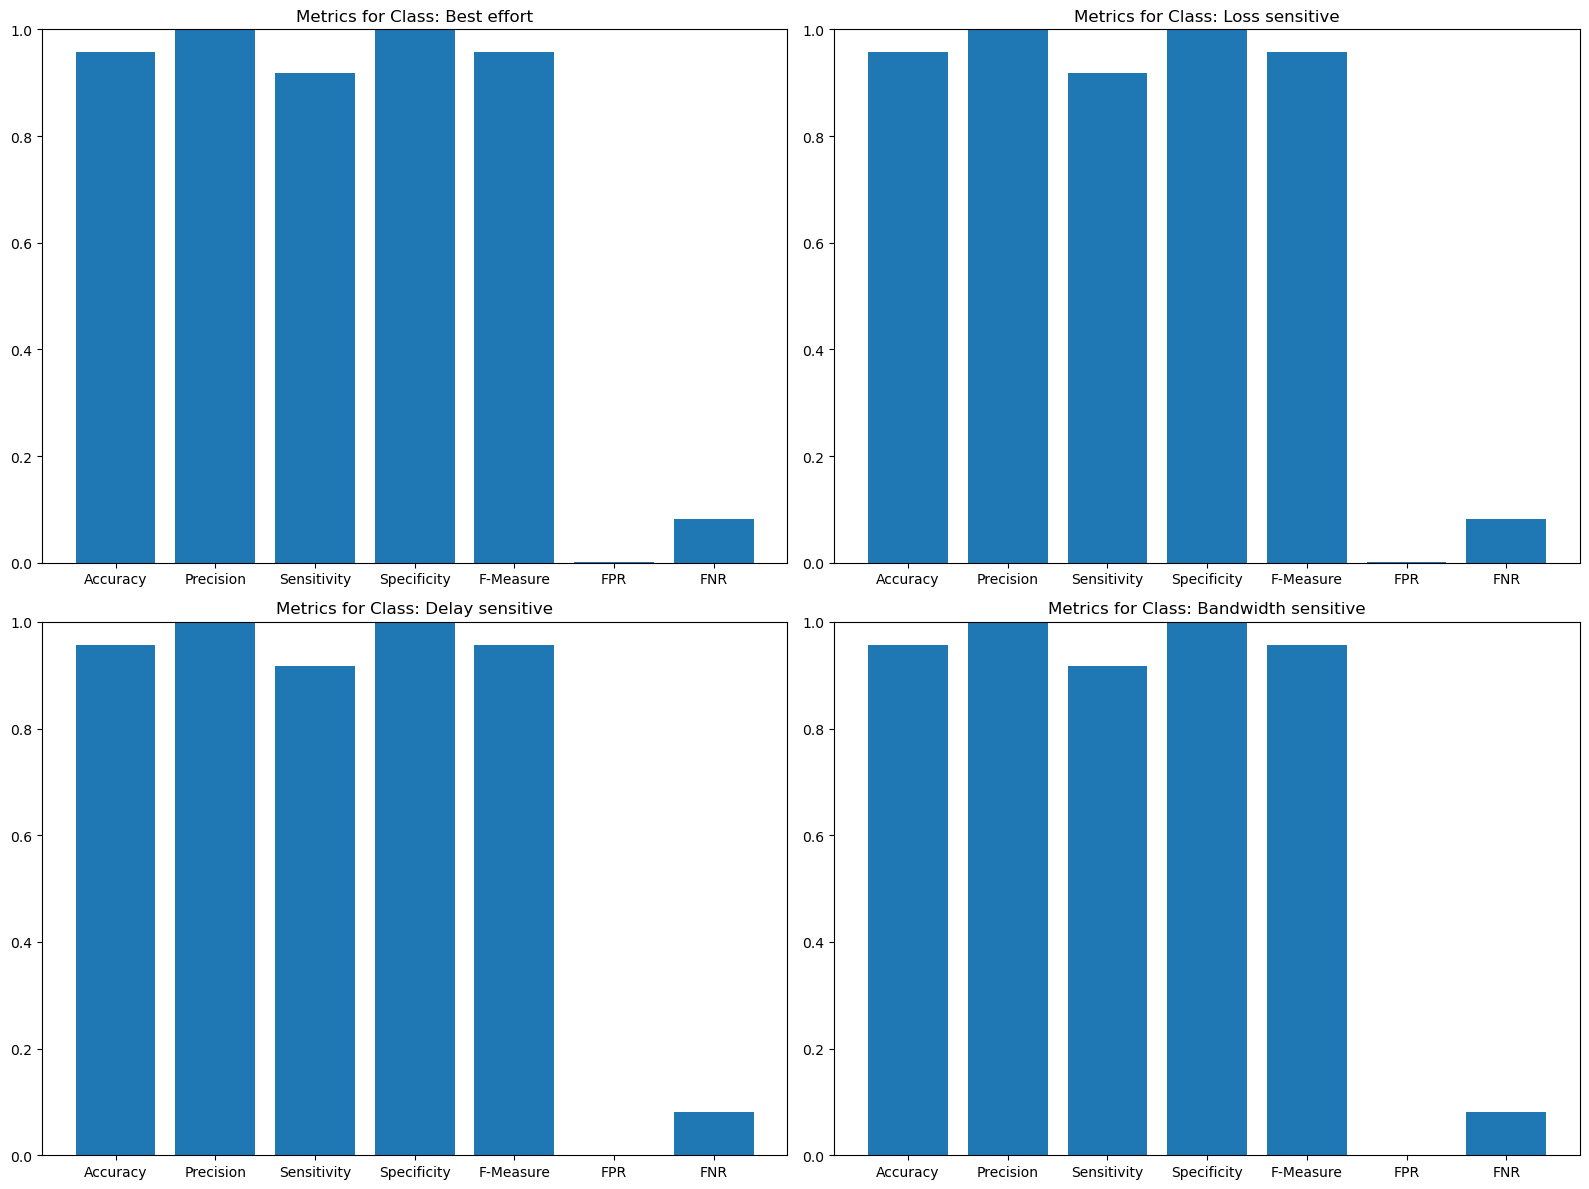

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = [(TP[i] + TN[i]) / (TP[i] + TN[i] + FP[i] + FN[i]) for i in range(4)]
precision = [TP[i] / (TP[i] + FP[i]) for i in range(4)]
sensitivity = [TP[i] / (TP[i] + FN[i]) for i in range(4)]
specificity = [TN[i] / (TN[i] + FP[i]) for i in range(4)]
f_measure = [2 * (precision[i] * sensitivity[i]) / (precision[i] + sensitivity[i]) for i in range(4)]
# mcc = [(TP[i] * TN[i] - FP[i] * FN[i]) / np.sqrt((TP[i] + FP[i]) * (TP[i] + FN[i]) * (TN[i] + FP[i]) * (TN[i] + FN[i])) for i in range(4)]
# npv = [TN[i] / (TN[i] + FN[i]) for i in range(4)]
fpr = [FP[i] / (FP[i] + TN[i]) for i in range(4)]
fnr = [FN[i] / (FN[i] + TP[i]) for i in range(4)]

# Plot bar graphs
metrics_names = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR']

classes = ['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive']

plt.figure(figsize=(16, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    print(metrics_names, [accuracy[i], precision[i], sensitivity[i], specificity[i], f_measure[i], fpr[i], fnr[i]])
    plt.bar(metrics_names, [accuracy[i], precision[i], sensitivity[i], specificity[i], f_measure[i], fpr[i], fnr[i]])
    plt.title(f'Metrics for Class: {classes[i]}')
    plt.ylim(0, 1)  # Setting y-axis limit to 1 for better visualization

plt.tight_layout()
plt.show()

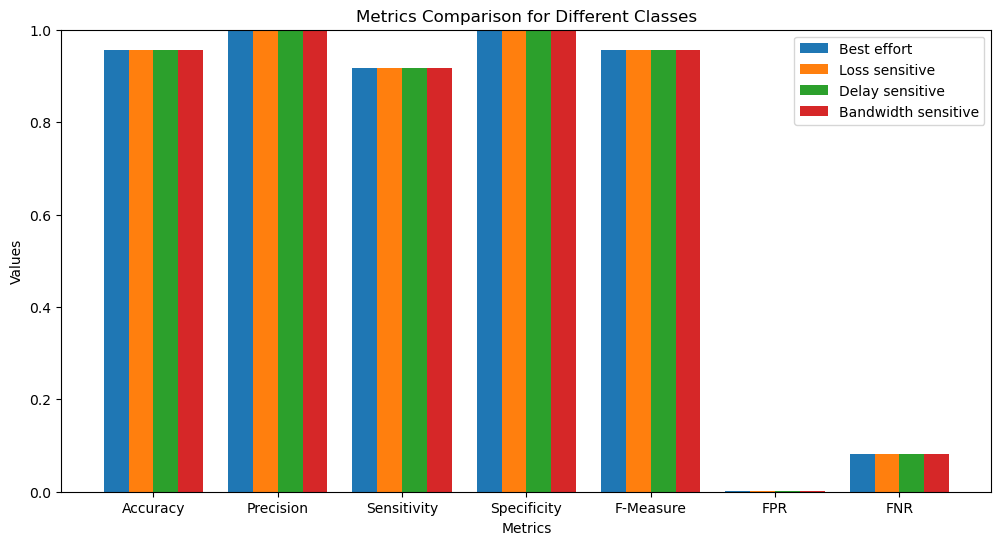

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = [(TP[i] + TN[i]) / (TP[i] + TN[i] + FP[i] + FN[i]) for i in range(4)]
precision = [TP[i] / (TP[i] + FP[i]) for i in range(4)]
sensitivity = [TP[i] / (TP[i] + FN[i]) for i in range(4)]
specificity = [TN[i] / (TN[i] + FP[i]) for i in range(4)]
f_measure = [2 * (precision[i] * sensitivity[i]) / (precision[i] + sensitivity[i]) for i in range(4)]
# mcc = [(TP[i] * TN[i] - FP[i] * FN[i]) / np.sqrt((TP[i] + FP[i]) * (TP[i] + FN[i]) * (TN[i] + FP[i]) * (TN[i] + FN[i])) for i in range(4)]
# npv = [TN[i] / (TN[i] + FN[i]) for i in range(4)]
fpr = [FP[i] / (FP[i] + TN[i]) for i in range(4)]
fnr = [FN[i] / (FN[i] + TP[i]) for i in range(4)]

# Create a single bar graph
metrics_names = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F-Measure', 'FPR', 'FNR']
classes = ['Best effort', 'Loss sensitive', 'Delay sensitive', 'Bandwidth sensitive']

plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(metrics_names))

# Plot bars for each class
for i in range(4):
    plt.bar(index + i * bar_width, [accuracy[i], precision[i], sensitivity[i], specificity[i], f_measure[i], fpr[i], fnr[i]],
            width=bar_width, label=f'{classes[i]}')

# Configure the plot
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics Comparison for Different Classes')
plt.xticks(index + bar_width * 1.5, metrics_names)
plt.legend()
plt.ylim(0, 1)  # Setting y-axis limit to 1 for better visualization

plt.show()

In [ ]:
import torchaudio
metadata = torchaudio.info(r"C:\Users\alosh\Downloads\asmr_diddly\ASMR Follow My Instructions.mp4")
print(metadata)